In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
football = pd.read_csv('..\data\FootballDataEurope.csv')

In [3]:
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              25979 non-null  int64  
 1   country_name    25979 non-null  object 
 2   league_name     25979 non-null  object 
 3   season          25979 non-null  object 
 4   stage           25979 non-null  int64  
 5   date            25979 non-null  object 
 6   home_team       25979 non-null  object 
 7   away_team       25979 non-null  object 
 8   home_team_goal  25979 non-null  int64  
 9   away_team_goal  25979 non-null  int64  
 10  B365H           22592 non-null  float64
 11  B365D           22592 non-null  float64
 12  B365A           22592 non-null  float64
 13  BSH             14161 non-null  float64
 14  BSD             14161 non-null  float64
 15  BSA             14161 non-null  float64
 16  diff_goals      25979 non-null  int64  
 17  target          25979 non-null 

In [4]:
football = football[['country_name', 'season', 'home_team_goal', 'away_team_goal', 'diff_goals']]
football = football.rename(columns = {'country_name':'country', 'home_team_goal':'home_goal', 'away_team_goal':'away_goal', 'diff_goals':'goal_diff'})
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    25979 non-null  object
 1   season     25979 non-null  object
 2   home_goal  25979 non-null  int64 
 3   away_goal  25979 non-null  int64 
 4   goal_diff  25979 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1014.9+ KB


In [5]:
football['winner'] = football.goal_diff.apply(lambda x: 'home_team' if x > 0 else ('away_team' if x < 0 else 'draw'))
football.head()

,country,season,home_goal,away_goal,goal_diff,winner
0,Switzerland,2008/2009,1,2,-1,away_team
1,Switzerland,2008/2009,3,1,2,home_team
2,Switzerland,2008/2009,1,2,-1,away_team
3,Switzerland,2008/2009,1,2,-1,away_team
4,Switzerland,2008/2009,1,0,1,home_team


In [6]:
dummies = pd.get_dummies(football['winner'])
football = pd.concat([football, dummies], axis=1)
football.head()

,country,season,home_goal,away_goal,goal_diff,winner,away_team,draw,home_team
0,Switzerland,2008/2009,1,2,-1,away_team,1,0,0
1,Switzerland,2008/2009,3,1,2,home_team,0,0,1
2,Switzerland,2008/2009,1,2,-1,away_team,1,0,0
3,Switzerland,2008/2009,1,2,-1,away_team,1,0,0
4,Switzerland,2008/2009,1,0,1,home_team,0,0,1


In [7]:
football['total_goal'] = (football.home_goal + football.away_goal)
football.head()

,country,season,home_goal,away_goal,goal_diff,winner,away_team,draw,home_team,total_goal
0,Switzerland,2008/2009,1,2,-1,away_team,1,0,0,3
1,Switzerland,2008/2009,3,1,2,home_team,0,0,1,4
2,Switzerland,2008/2009,1,2,-1,away_team,1,0,0,3
3,Switzerland,2008/2009,1,2,-1,away_team,1,0,0,3
4,Switzerland,2008/2009,1,0,1,home_team,0,0,1,1


In [8]:
df = football.groupby(['season', 'country'])['total_goal', 'home_team', 'away_team', 'draw'].mean().reset_index()
df.head()

<ipython-input-8-45e31155ffd4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = football.groupby(['season', 'country'])['total_goal', 'home_team', 'away_team', 'draw'].mean().reset_index()


,season,country,total_goal,home_team,away_team,draw
0,2008/2009,Belgium,2.794118,0.486928,0.294118,0.218954
1,2008/2009,England,2.478947,0.455263,0.289474,0.255263
2,2008/2009,France,2.257895,0.434211,0.271053,0.294737
3,2008/2009,Germany,2.921569,0.480392,0.277778,0.241830
4,2008/2009,Italy,2.600000,0.505263,0.244737,0.250000


# Netherlands is the only league to average over 3 goals per game, while Poland and France are the lowest scoring leagues, both averaging just under 2.5 goals per game.

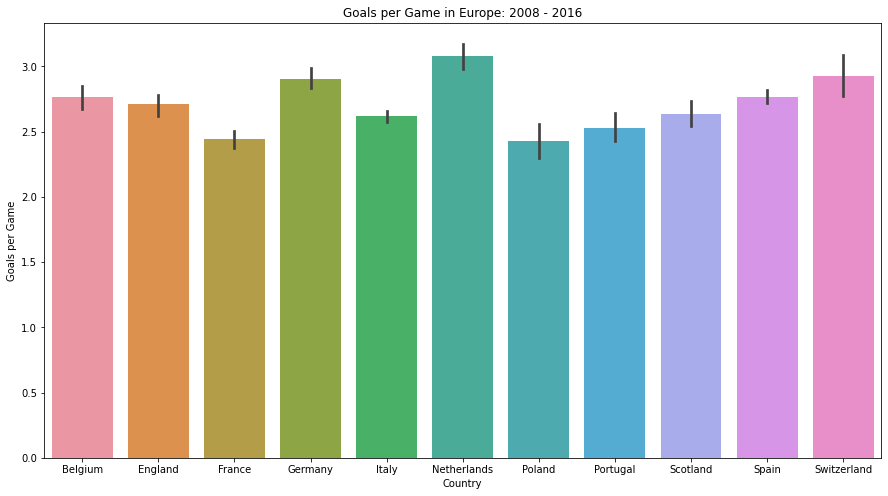

In [9]:
plt.figure(figsize = (15,8))
sns.barplot(data = df, x = 'country', y = 'total_goal')
plt.title('Goals per Game in Europe: 2008 - 2016')
plt.xlabel('Country')
plt.ylabel('Goals per Game')
plt.show()

# The Average # of goals per game has slightly risen across Europe between 2008 and 2016.

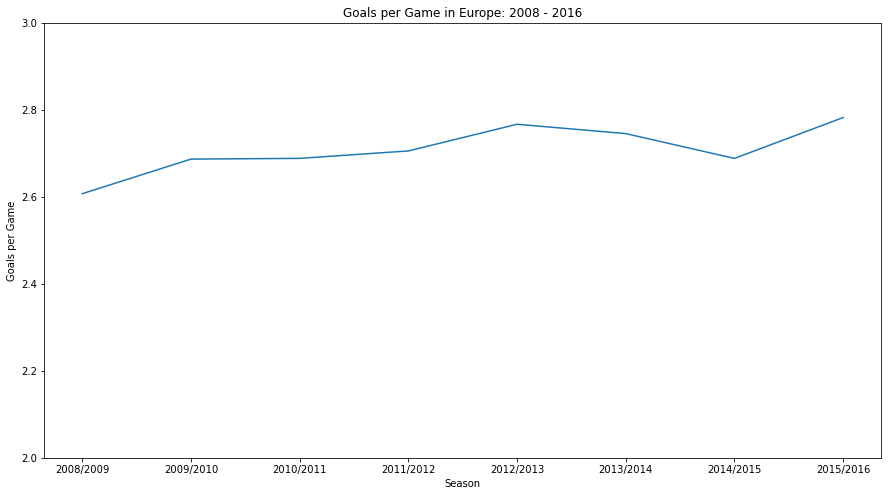

In [10]:
plt.figure(figsize = (15,8))
sns.lineplot(data = df, x = 'season', y = 'total_goal', ci=None)
plt.title('Goals per Game in Europe: 2008 - 2016')
plt.xlabel('Season')
plt.ylabel('Goals per Game')
plt.ylim(2, 3)
plt.show()

# The Hardest Country to get a result as an away team has been Spain.  The most giving home teams have been in Scotland.

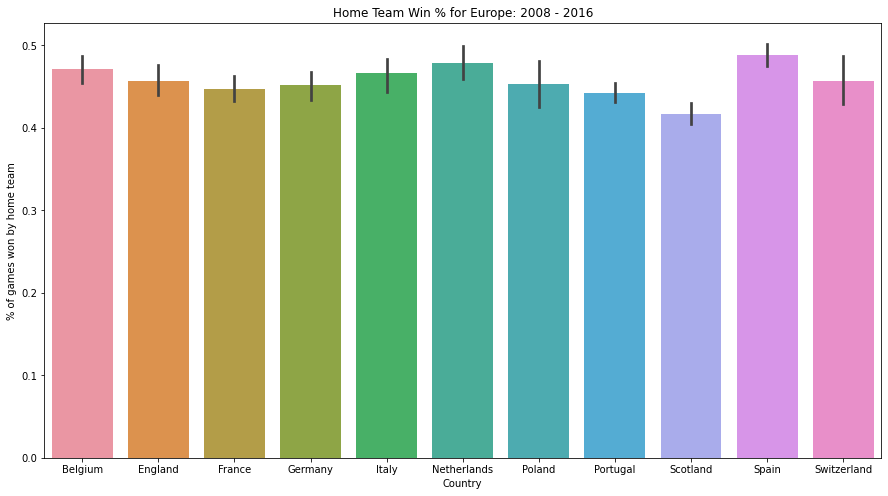

In [11]:
plt.figure(figsize = (15,8))
sns.barplot(data = df, x = 'country', y = 'home_team')
plt.title('Home Team Win % for Europe: 2008 - 2016')
plt.xlabel('Country')
plt.ylabel('% of games won by home team')
plt.show()

# European home advantage has slightly decreased in the last 8 years. 
# Last Season, home teams gained the full 3 points just over 44% of the time, with away teams winning outright slightly less than 31% of the time.

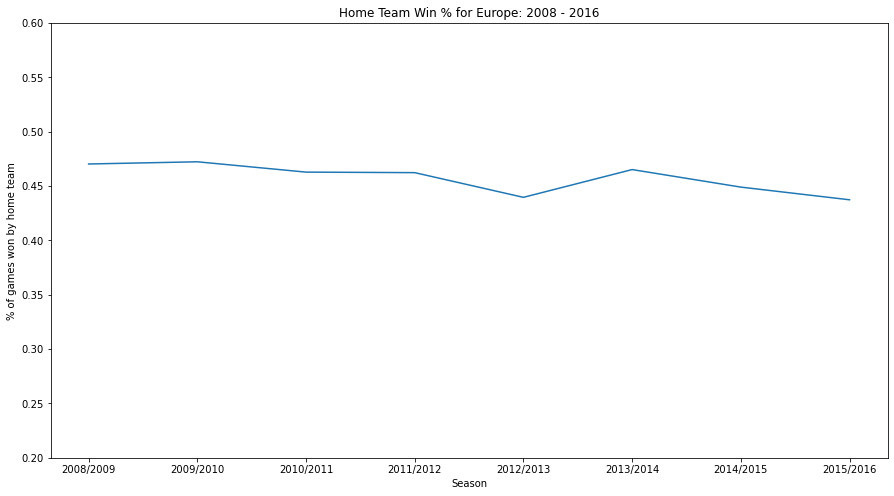

In [12]:
plt.figure(figsize = (15,8))
sns.lineplot(data = df, x = 'season', y = 'home_team', ci=None)
plt.title('Home Team Win % for Europe: 2008 - 2016')
plt.xlabel('Season')
plt.ylabel('% of games won by home team')
plt.ylim(0.2, 0.6)
plt.show()

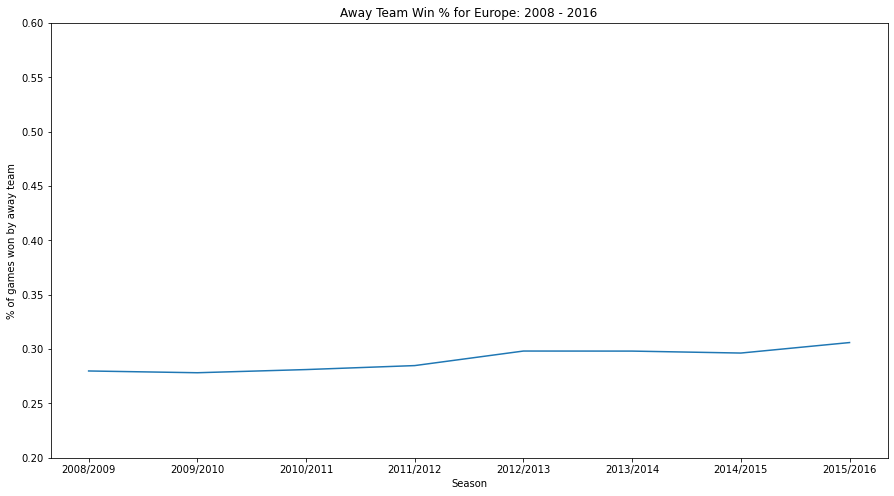

In [13]:
plt.figure(figsize = (15,8))
sns.lineplot(data = df, x = 'season', y = 'away_team', ci = None)
plt.title('Away Team Win % for Europe: 2008 - 2016')
plt.xlabel('Season')
plt.ylabel('% of games won by away team')
plt.ylim(0.2, 0.6)
plt.show()

# Around 1 in 4 games in Europe ends in a Draw.

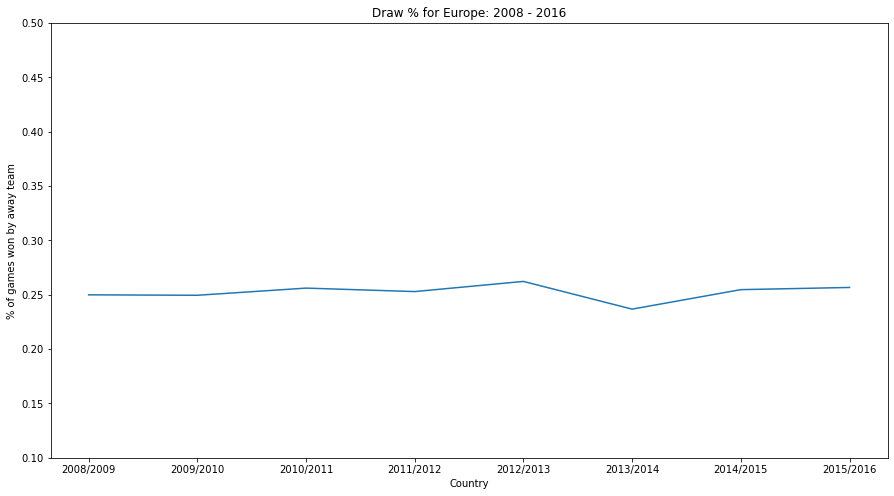

In [14]:
plt.figure(figsize = (15,8))
sns.lineplot(data = df, x = 'season', y = 'draw', ci = None)
plt.title('Draw % for Europe: 2008 - 2016')
plt.xlabel('Country')
plt.ylabel('% of games won by away team')
plt.ylim(0.1, 0.5)
plt.show()